In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

animal_data_complete = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
df = animal_data_complete
df = df[(df["Drug"] == 'Capomulin') |
        (df["Drug"] == 'Infubinol') |
        (df["Drug"] == 'Ketapril') |
        (df["Drug"] == 'Placebo')]

df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


# Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

df_tumor_data = df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
tumor_response = df_tumor_data.groupby(["Drug", "Timepoint"])

In [5]:
mean_tumor_volume = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].mean())
mean_tumor_volume.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

standard_error_of_tumor_volumes = pd.DataFrame(tumor_response["Tumor Volume (mm3)"].sem())
standard_error_of_tumor_volumes.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames

mean_tumor_volume_format = mean_tumor_volume.reset_index()
mean_tumor_volume_format_df = mean_tumor_volume_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug") 
mean_tumor_volume_format_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [8]:
# Minor Data Munging to Re-Format the Data Frames

standard_error_of_tumor_volumes_format = standard_error_of_tumor_volumes.reset_index()
standard_error_of_tumor_volumes_df = standard_error_of_tumor_volumes_format.pivot_table(values = "Tumor Volume (mm3)", index = "Timepoint", columns = "Drug")
standard_error_of_tumor_volumes_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


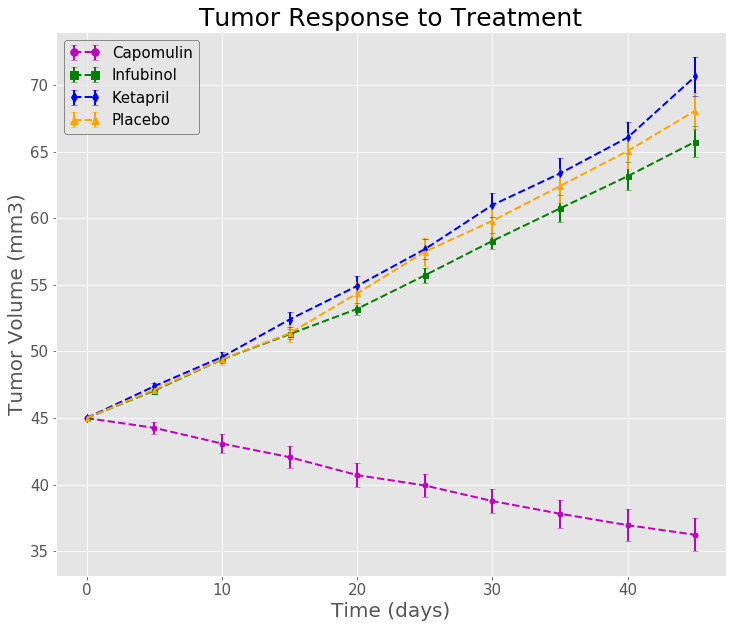

In [23]:
# Generate the Plot (with Error Bars)

colors = ['m', 'g', 'b', 'orange']
labels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', 's', 'd', '^']

x_axis_tumor = mean_tumor_volume_format["Timepoint"]
y_axis_tumor = mean_tumor_volume_format["Tumor Volume (mm3)"]
plt.title("Tumor Response to Treatment", fontsize = 25)
plt.xlabel("Time (days)", fontsize = 20)
plt.ylabel("Tumor Volume (mm3)", fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.grid(True)

plt.gcf().set_size_inches((12, 10))

x_values = mean_tumor_volume_format_df.index

count = 0 

for i in mean_tumor_volume_format_df.columns:
    plt.errorbar(x_values, 
             mean_tumor_volume_format_df[i],
             standard_error_of_tumor_volumes_df[i],
             linestyle = '--', 
             linewidth=2,
             markersize=5,
             marker =  markers[count],
             color = colors[count],
             label = labels[count],
             capthick = 0.5,
             capsize = 3)
    count += 1
    
plt.legend(numpoints = 2,
           fontsize = 15,
           frameon = True,
           markerscale = 1.5,
           edgecolor = 'black')

plt.style.use("ggplot")
plt.savefig("tumor_response_to_treatment_plot.png")
plt.show()

# Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

df_metastatic_data = df[["Drug", "Timepoint", "Metastatic Sites"]]
metastatic_data = df_metastatic_data.groupby(["Drug", "Timepoint"])

In [11]:
mean_met_site_data = pd.DataFrame(metastatic_data["Metastatic Sites"].mean())
mean_met_site_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint

standard_error_of_met_site = pd.DataFrame(metastatic_data["Metastatic Sites"].sem())
standard_error_of_met_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames

mean_met_site_data_format = mean_met_site_data.reset_index()
mean_met_site_data_format_df = mean_met_site_data_format.pivot_table(values = "Metastatic Sites", index = "Timepoint", columns = "Drug")
mean_met_site_data_format_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [14]:
# Minor Data Munging to Re-Format the Data Frames

standard_error_of_met_site_format = standard_error_of_met_site.reset_index()
standard_error_of_met_site_df = standard_error_of_met_site_format.pivot_table(values = "Metastatic Sites", index = "Timepoint", columns = "Drug")
standard_error_of_met_site_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


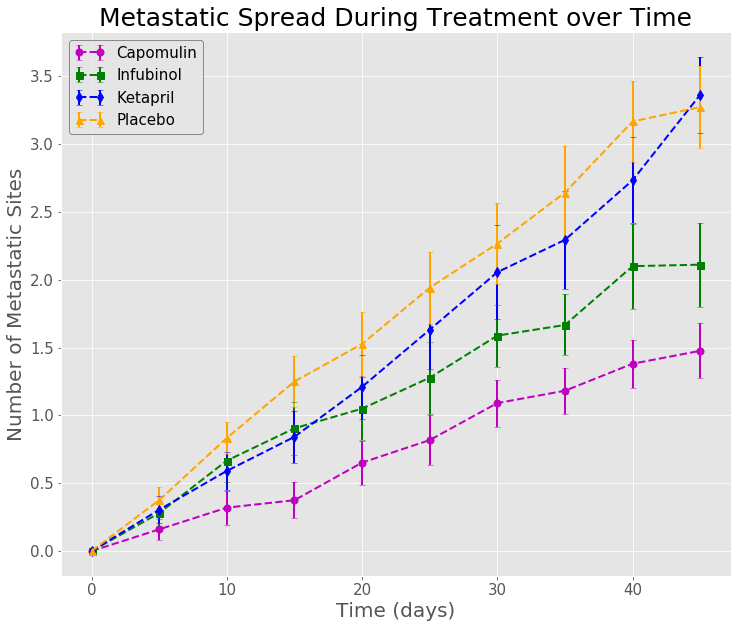

In [15]:
# Generate the Plot (with Error Bars)


x_axis_metsite = mean_met_site_data_format["Timepoint"]
y_axis_metsite =  mean_met_site_data_format["Metastatic Sites"]
plt.title("Metastatic Spread During Treatment over Time", fontsize = 25)
plt.xlabel("Time (days)", fontsize = 20)
plt.ylabel("Number of Metastatic Sites", fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.grid(True)

plt.gcf().set_size_inches((12, 10))

x_values = mean_met_site_data_format_df.index

count = 0 

for i in mean_met_site_data_format_df.columns:
    plt.errorbar(x_values, 
             mean_met_site_data_format_df[i],
             standard_error_of_met_site_df[i],
             linestyle = '--', 
             linewidth=2,
             marker =  markers[count],
             markersize=7,
             color = colors[count],
             label = labels[count],
             capthick = 0.5,
             capsize = 3)
    count += 1
    
plt.legend(numpoints = 2,
           fontsize = 15,
           frameon = True,
           edgecolor = 'black')

plt.style.use("ggplot")
plt.savefig("metastatic_response_to_treatment_plot.png")
plt.show()

# Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

df_mouse_data = df[["Drug", "Timepoint", "Mouse ID"]]
mouse_data = df_mouse_data.groupby(["Drug", "Timepoint"])

In [17]:
count_of_mice = pd.DataFrame(mouse_data["Mouse ID"].count())
count_of_mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames

count_of_mice_format = count_of_mice.reset_index()
count_of_mice_format_df = count_of_mice.pivot_table(values = "Mouse ID", index = "Timepoint", columns = "Drug")
count_of_mice_format_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


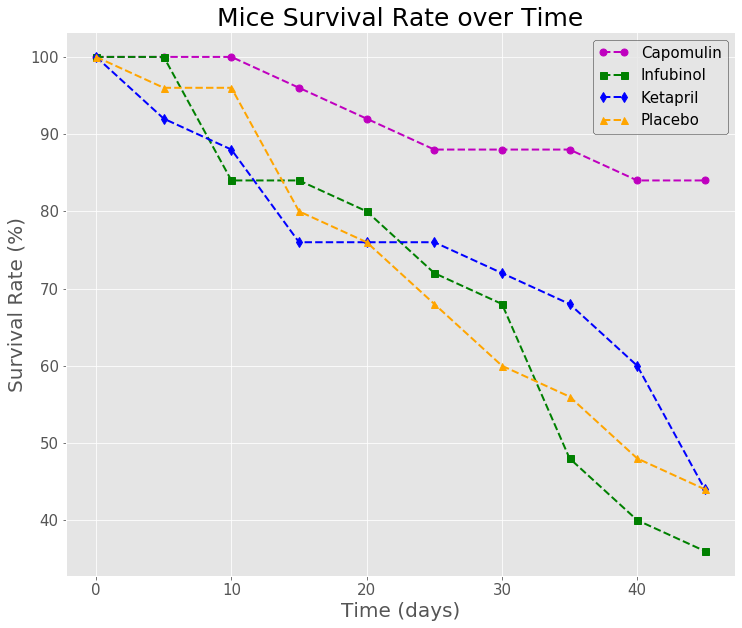

In [19]:
# Generate the Plot (Accounting for percentages)

plt.title("Mice Survival Rate over Time", fontsize=25)
plt.xlabel("Time (days)", fontsize = 20)
plt.ylabel("Survival Rate (%)", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.grid(True)

plt.gcf().set_size_inches((12, 10))

x_values = count_of_mice_format_df.index

count = 0 

for i in count_of_mice_format_df:
    y_values = count_of_mice_format_df[i] / count_of_mice_format_df.loc[0,i] * 100 
    plt.plot(x_values, 
             y_values, 
             linestyle = '--', 
             marker =  markers[count],
             markersize=7,
             linewidth=2,
             color = colors[count],
             label = labels[count])
    count += 1
    
plt.legend(numpoints = 2,
           fontsize = 15,
           frameon = True,
           edgecolor = 'black')
plt.style.use("ggplot")
plt.savefig("survival_rate_plot.png")
plt.show()

# Summary Bar Graph

In [20]:
mean_tumor_volume_format_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [21]:
# Calculate the percent changes for each drug
mean_tumor_change =  (mean_tumor_volume_format_df.iloc[-1] - mean_tumor_volume_format_df.iloc[0]) / mean_tumor_volume_format_df.iloc[0] * 100

# Display the data to confirm
mean_tumor_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

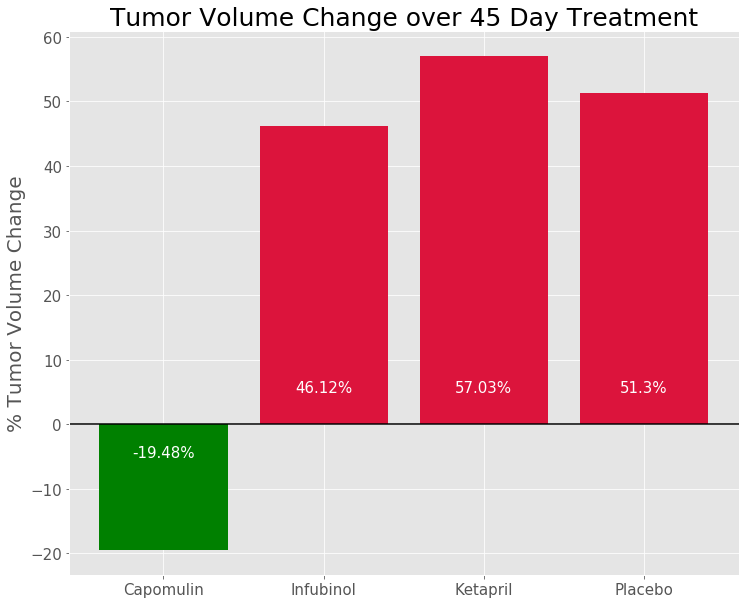

In [22]:
# Orient widths. Add labels, tick marks, etc. 

plt.title('Tumor Volume Change over 45 Day Treatment', fontsize = 25)
plt.ylabel('% Tumor Volume Change', fontsize = 20)
plt.yticks(fontsize = 15)
plt.axhline(y=0, color = 'black')
plt.gcf().set_size_inches((12, 10))

xlabel = mean_tumor_change.index
plt.xticks(np.arange(len(xlabel)), xlabel, fontsize = 15)

# Condition for passing and failing drugs
plt.bar(np.arange(4), mean_tumor_change, color = ['crimson' if mean_tumor_change[i] > 0 else 'green' for i in np.arange(len(xlabel))])

# Labels for the percentages of changes
counter = 0

for i in mean_tumor_change:
    if i < 0:
        y_axis = -5
    else:
        y_axis = 5
    plt.text(counter, y_axis, str(round(i, 2)) + '%', ha = 'center', color = 'white', fontsize = 15)
    counter += 1

# Save and show the Figure
plt.style.use("ggplot")
plt.savefig("tumor_volume_change_plot.png")
plt.show()